In [1]:
from SciComp.bvp import BVP
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.integrate import solve_ivp
from math import ceil


<!-- Set size to small -->
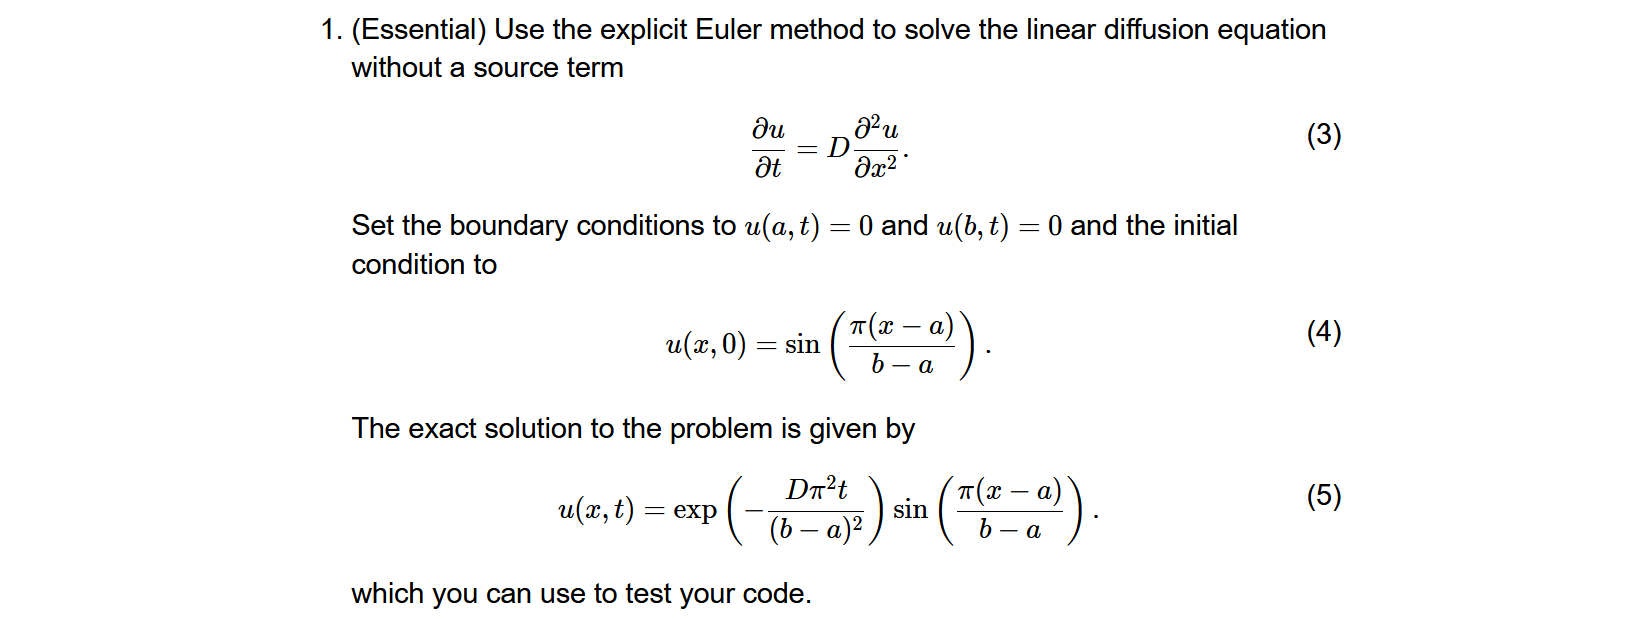

In [2]:
# Define PDE 
a = 0
b = 1
alpha = 0
beta = 0
f_fun = lambda x, t: np.sin(np.pi * (x - a) / (b - a))
D = 0.1
N = 100


bvp = BVP(a, b, N, alpha, beta, D=D, condition_type='Dirichlet', f_fun=f_fun)

t_boundary = 0
C = 0.5
t_final = 2

t, dt, C = bvp.time_discretization(t_boundary, t_final, C=C)

u = bvp.explicit_euler(t)

In [3]:
# Get analytical solution
analytic_sol = lambda x, t: np.exp(-D * np.pi**2 * t / (b-a)**2) * np.sin(np.pi * (x - a) / (b - a))

u_analytic = np.zeros((len(bvp.x_values), len(t)))
for xi, x in enumerate(bvp.x_values):
    for ti, t_ in enumerate(t):
        u_analytic[xi, ti] = analytic_sol(x, t_)
        
# Calculate the error at each time step
error = np.abs(u - u_analytic)

# Sum error for each column
error_sum = np.sum(error, axis=0)

# Plot the error
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=error_sum, name='Error'))
fig.update_layout(title='Error', xaxis_title='t', yaxis_title='Error')

fig.show()

In [5]:
from SciComp.plotting import plot_PDE_fixed_time

plot_PDE_fixed_time(bvp.x_values, u, t, analytic_sol)

In [46]:
import numpy as np
from SciComp.solvers import rk4_step

a = 0
b = 1
alpha = 0
beta = 0
f_fun = lambda x, t: np.sin(np.pi * (x - a) / (b - a))
D = 0.1
N = 100

bvp = BVP(a, b, N, alpha, beta, condition_type='Dirichlet', f_fun=f_fun, D=D)

t_boundary = 0
dt = 0.0001
t_final = 1
t, dt, C = bvp.time_discretization(t_boundary, t_final, dt=dt)

A, b, x_array = bvp.construct_matrix()


u = np.zeros((len(t), len(x_array)))
u[0, :] = bvp.f_fun(x_array, t[-1])


def PDE(t, u, D=D, A=A, b=b):
    return  D / bvp.dx ** 2 * (A @ u + b)

# Loop over time
for ti in range(0, len(t)-1):
    T, Y = rk4_step(PDE, t[ti], u[ti, :], dt)
    u[ti+1, :] = Y

C:\Users\duppu\AppData\Local\Temp\ipykernel_14188\1910483412.py:8: RuntimeWarning:

divide by zero encountered in divide

C:\Users\duppu\AppData\Local\Temp\ipykernel_14188\1910483412.py:8: RuntimeWarning:

invalid value encountered in sin



In [6]:
# Check against fixed t
idx = [1000, 2000, 3000, 4000, len(t)-1000]

fig = go.Figure()
for id in idx:
    t_check = t[id]
    # idx = np.where(t == t_check)[0][0]
    fig.add_trace(go.Scatter(x=x_array, y=u[id, :], name=f't = {t_check}'))
    fig.add_trace(go.Scatter(x=x_array, y=analytic_sol(x_array, t_check), name=f'Analytic t = {t_check}', mode='lines', line=dict(dash='dash')))
fig.show()


NameError: name 'x_array' is not defined

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Animating...


<IPython.core.display.Javascript object>


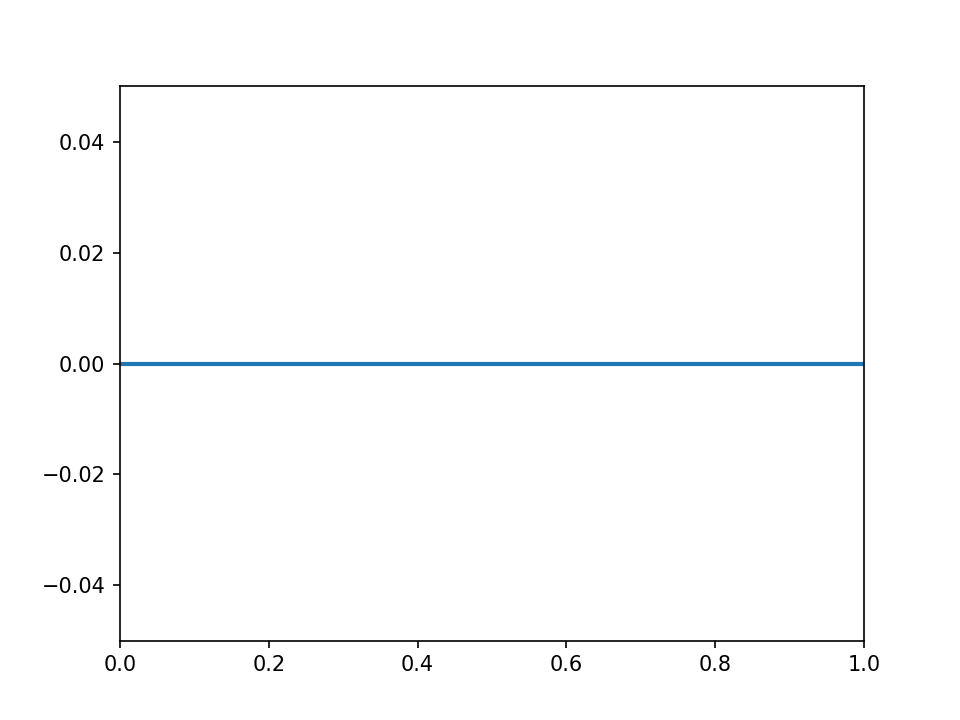

In [7]:
from SciComp.plotting import animate_PDE
from SciComp.bvp import BVP
import numpy as np

# Bratu problem
a = 0
b = 1
N = 20
alpha = 0
beta = 0
D = 1
mu = 2
q_fun = lambda x, u: np.exp(mu*u)
f_fun = lambda x, t: np.zeros(len(x))
bvp = BVP(a, b, N, alpha, beta, condition_type='Dirichlet', q_fun=q_fun, f_fun=f_fun, D=D)

t_boundary = 0
t_final = 1
dt = 0.001


u, t, dt, C = bvp.solve_PDE(t_boundary, t_final, dt=dt, method='Explicit Euler')
print(u)

%matplotlib notebook
animate_PDE(bvp, u, t)

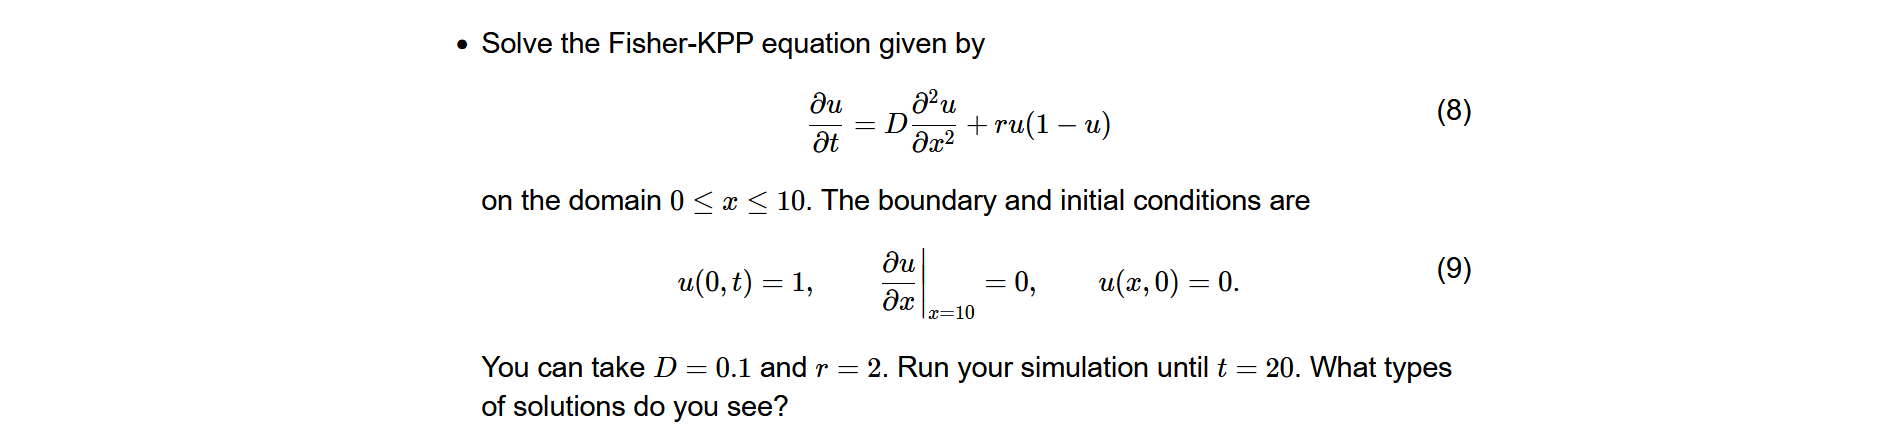

Animating...


<IPython.core.display.Javascript object>


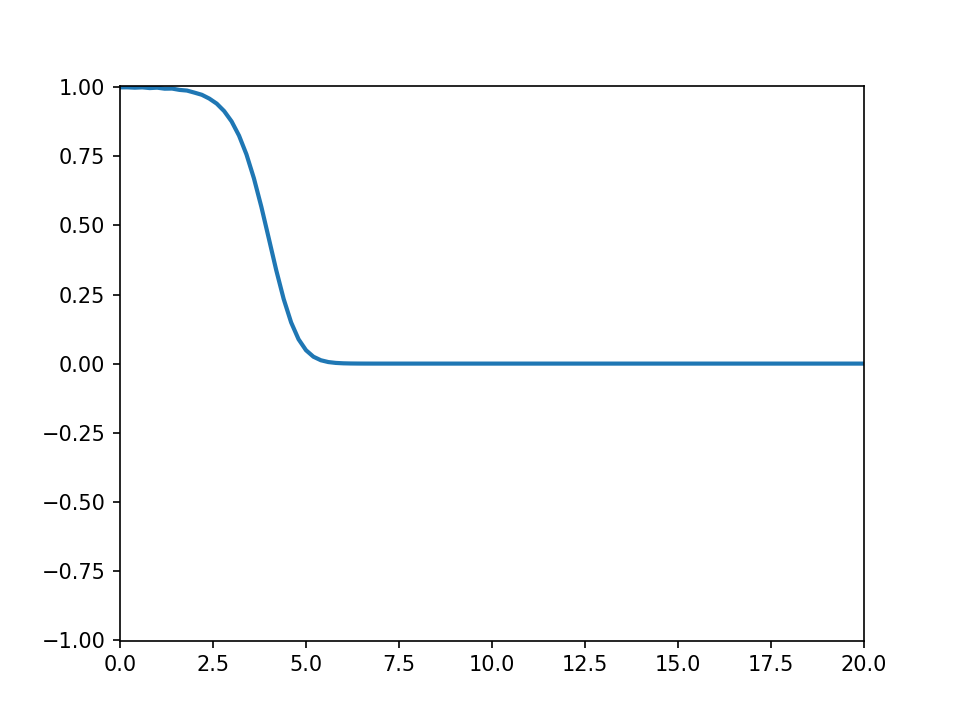

In [8]:
# Fisher-KPP problem
a = 0
b = 20
N = 100
alpha = 1
delta = 0
condition_type = 'Neumann'
D = 0.1
r = 2
f_fun = lambda x, t: np.zeros(len(x))
q_fun = lambda x, u: r*u*(1-u)

bvp = BVP(a, b, N, alpha=alpha, delta=delta, condition_type=condition_type, f_fun=f_fun, q_fun=q_fun, D=D)

C = 0.4
t_boundary = 0
t_final = 20

t, dt, C = bvp.time_discretization(t_boundary, t_final, C=C)

u = bvp.scipy_solver(t)

animate_PDE(bvp, u, t)